In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
import math

In [59]:
pwd()

'C:\\Users\\Ayan Mukherjee\\Desktop'

In [60]:
bikes=pd.read_csv('original.csv')

In [61]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [62]:
bikes.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [63]:
bikes.columns

Index(['index', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'demand'],
      dtype='object')

In [64]:
#drop index,date,casual,registered
bikes_prep=bikes.drop(['index','date','casual','registered'],axis=1)

In [65]:
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [66]:
#Missing value check
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

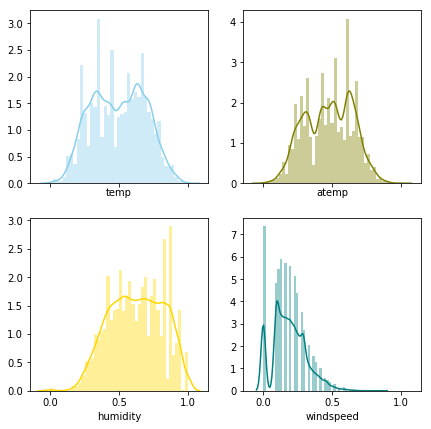

In [67]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
#All continuous variable plotting
sns.distplot(bikes_prep['temp'],color="skyblue",ax=axes[0, 0])
sns.distplot(bikes_prep['atemp'],color="olive",ax=axes[0, 1])
sns.distplot(bikes_prep['humidity'],color="gold",ax=axes[1, 0])
sns.distplot(bikes_prep['windspeed'],color="teal",ax=axes[1, 1])

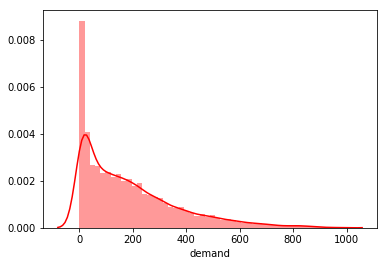

In [68]:
sns.distplot(bikes_prep['demand'],color="red")

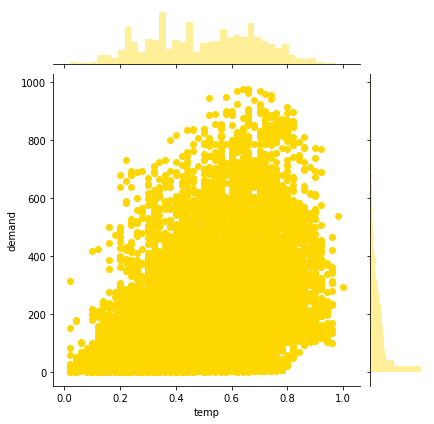

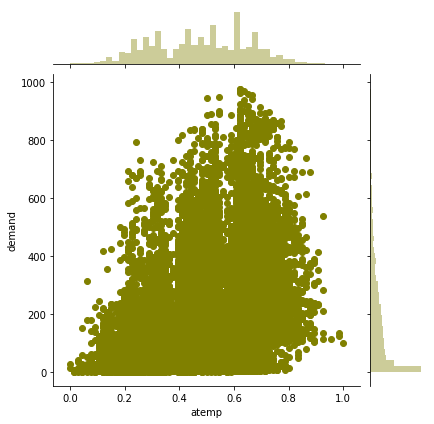

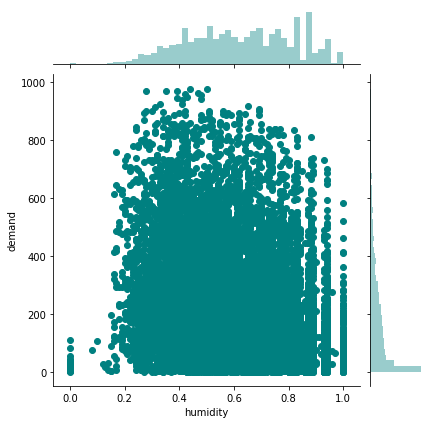

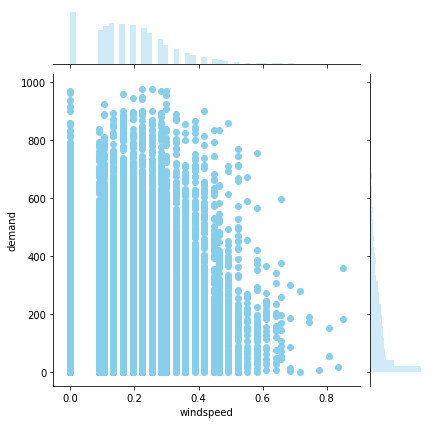

In [69]:
#Linear relationship
sns.jointplot(x='temp',y='demand',data=bikes_prep,color='gold')
sns.jointplot(x='atemp',y='demand',data=bikes_prep,color='olive')
sns.jointplot(x='humidity',y='demand',data=bikes_prep,color='teal')
sns.jointplot(x='windspeed',y='demand',data=bikes_prep,color='skyblue')

In [70]:
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


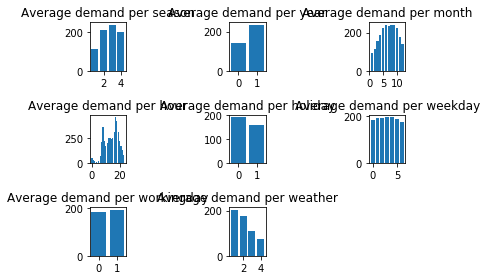

In [71]:

plt.subplot(3,3,1)
plt.title('Average demand per season')
cat_list=bikes_prep['season'].unique()
cat_avg=bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,2)
plt.title('Average demand per year')
cat_list=bikes_prep['year'].unique()
cat_avg=bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,3)
plt.title('Average demand per month')
cat_list=bikes_prep['month'].unique()
cat_avg=bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,4)
plt.title('Average demand per hour')
cat_list=bikes_prep['hour'].unique()
cat_avg=bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,5)
plt.title('Average demand per holiday')
cat_list=bikes_prep['holiday'].unique()
cat_avg=bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,6)
plt.title('Average demand per weekday')
cat_list=bikes_prep['weekday'].unique()
cat_avg=bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,7)
plt.title('Average demand per workingday')
cat_list=bikes_prep['workingday'].unique()
cat_avg=bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,8)
plt.title('Average demand per weather')
cat_list=bikes_prep['weather'].unique()
cat_avg=bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.tight_layout()

In [72]:
bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [73]:
#Drop the variables: atemp,windspeed,year,weekday,workingday
#Log transform demand variable
bikes_prep.head()
bikes_prep=bikes_prep.drop(['atemp','windspeed','weekday','workingday','year'],axis=1)

In [74]:
bikes_prep.describe()

,season,month,hour,holiday,weather,temp,humidity,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,6.537775,11.546752,0.028770,1.425283,0.496987,0.627229,189.463088
std,1.106918,3.438776,6.914405,0.167165,0.639357,0.192556,0.192930,181.387599
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.340000,0.480000,40.000000
50%,3.000000,7.000000,12.000000,0.000000,1.000000,0.500000,0.630000,142.000000
75%,3.000000,10.000000,18.000000,0.000000,2.000000,0.660000,0.780000,281.000000
max,4.000000,12.000000,23.000000,1.000000,4.000000,1.000000,1.000000,977.000000


In [75]:
bikes_prep['demand'].quantile([.01,.1,.5,.9,.95,.99])

0.01      2.00
0.10      9.00
0.50    142.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [76]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x173de1d65f8>)

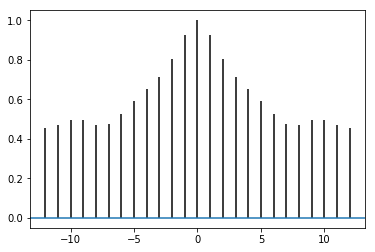

In [77]:
#Autocorrelation
df1=pd.to_numeric(bikes_prep['demand'],downcast='float')
plt.acorr(df1,maxlags=12)

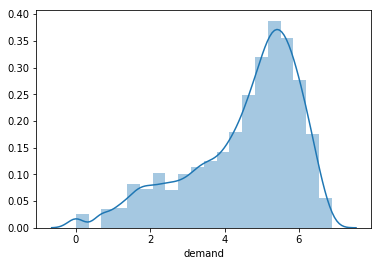

In [78]:
bikes_prep['demand']=np.log(bikes_prep['demand'])
sns.distplot(bikes_prep['demand'],bins=20)

In [92]:
#Lag vars for demand

t_1=bikes_prep['demand'].shift(+1).to_frame()
t_2=bikes_prep['demand'].shift(+2).to_frame()
t_3=bikes_prep['demand'].shift(+3).to_frame()

t_1.columns=['t-1']
t_2.columns=['t-2']
t_3.columns=['t-3']

In [95]:
bikes_prep_lag=pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)

In [99]:
bikes_prep_lag=bikes_prep_lag.dropna()
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [101]:
#Dummy variables
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [103]:
bikes_prep_lag['season']=bikes_prep_lag['season'].astype('category')
bikes_prep_lag['month']=bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour']=bikes_prep_lag['hour'].astype('category')
bikes_prep_lag['holiday']=bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather']=bikes_prep_lag['weather'].astype('category')

In [108]:
bikes_dummies =pd.get_dummies(bikes_prep_lag,drop_first=True)

In [111]:
type(bikes_dummies)

pandas.core.frame.DataFrame

In [112]:
final_data=pd.DataFrame(bikes_dummies)

In [113]:
final_data.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
X=final_data.drop(['demand'],axis=1)
Y=final_data['demand']

In [120]:
#from sklearn.model_selection import train_test_split will not work here as demand is time-series

In [121]:
tr_size=int(0.7*len(X))

In [123]:
X_train=X.values[0:tr_size]
X_test=X.values[tr_size:len(X)]

Y_train=Y.values[0:tr_size]
Y_test=Y.values[tr_size:len(Y)]

In [124]:
#Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression
std_reg=LinearRegression()

In [126]:
std_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
r2_train=std_reg.score(X_train,Y_train)
r2_train

0.9195240591465778

In [130]:
r2_test=std_reg.score(X_test,Y_test)
r2_test

0.9287151360253384

In [131]:
Y_pred=std_reg.predict(X_test)

In [132]:
from sklearn.metrics import mean_squared_error

In [134]:
rmse=math.sqrt(mean_squared_error(Y_test,Y_pred))
rmse

0.38098800498170443

In [152]:
#Calculate RMSLE
Y_test_e=[]
Y_pred_e=[]

In [153]:
for i in range(0,len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_pred_e.append(math.exp(Y_pred[i]))

In [154]:
log_sq_sum=0.0

In [155]:
len(Y_test_e)

5213

In [156]:
len(Y_pred_e)

5213

In [157]:
for i in range(0,len(Y_test_e)):
    log_a=math.log(Y_test_e[i]+1)
    log_p=math.log(Y_pred_e[i]+1)
    log_diff=(log_p-log_a)**2
    log_sq_sum=log_sq_sum + log_diff

In [158]:
rmsle=math.sqrt(log_sq_sum/len(Y_test))
print(rmsle)

0.3560941706980208
